In [1]:
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

#통계 관련 패키지
import scipy as sp
import scipy.stats

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

# 선형 대수

## 데이터 유형

### 텐서

In [2]:
#이미지 데이터 가져오기
from scipy import misc

img_rgb = misc.face()

#데이터 구조 확인
print(img_rgb.shape)

(768, 1024, 3)


Text(0.5, 1.0, 'RGB 컬러')

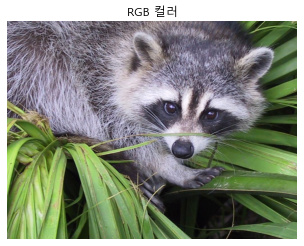

In [3]:
plt.imshow(img_rgb, cmap=plt.cm.gray)
plt.axis('off')
plt.title('RGB 컬러')

Text(0.5, 1.0, 'red 컬러')

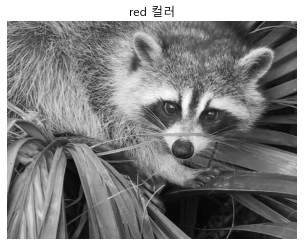

In [5]:
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)
plt.axis('off')
plt.title('red 컬러')

## 행 과 열 전치

In [16]:
ar = np.array([1, 2, 3])
print(ar.T)# 일차원 배열은 변화가 없음
print('------------------')

#이차원 배열 - 행렬 전치
ar = np.array([[1, 2, 3], [4, 5, 6]])
print(ar)
print('------------------')
print(ar.T)
print(ar.transpose())

#삼차원 배열
print('------------------')
ar = np.arange(24).reshape(2, 3, 4)
print(ar)
print('------------------')
#첫번째 있는 행 과 마지막의 면이 스위치
print(ar.T)
print(ar.T.shape)
print('------------------')
#3차원의 경우는 매개변수를 이용해서 원하는 구조로 변경 가능
print(ar.transpose()) # T 와 동일
print(ar.transpose(2, 1, 0)) # T 와 동일
print(ar.transpose(0, 2, 1)) # T 와 다른 순서로 변형

[1 2 3]
------------------
[[1 2 3]
 [4 5 6]]
------------------
[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]
------------------
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
(4, 3, 2)
------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
[[[ 0  4  8]
  [ 1  5  9]
  [ 2  6 10]
  [ 3  7 11]]

 [[12 16 20]
  [13 17 21]
  [14 18 22]
  [15 19 23]]]


## 특수 행렬

### 특수 행렬 생성

In [19]:
b1 = np.zeros((5,5))
print(b1)

b2 = np.ones((3,3))
print(b2)

b3 = np.empty((2,2))
print(b3)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[  7.2  224.64]
 [297.12   7.2 ]]


### 대각 행렬 과 항등 행렬

In [22]:
# 대각 행렬 생성
ar = np.diag([1, 2, 3])
print(ar)
print()

# 항등 행렬 생성
ar = np.eye(2)
print(ar)
print()

#diag 함수에 2차원 행렬을 대입하면 대각 요소만으로 이루어진 1차원 배열을 리턴
print(np.diag(ar))

[[1 0 0]
 [0 2 0]
 [0 0 3]]

[[1. 0.]
 [0. 1.]]

[1. 1.]


### 대칭 행렬

In [24]:
ar = np.eye(2)
print(ar) #대각 행렬
print(ar.T) # 대칭 행렬

ar = np.array([[1,2], [2, 1]]) 
print(ar)#대각 행렬은 아님
print(ar.T)#대칭 행렬

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
[[1 2]
 [2 1]]
[[1 2]
 [2 1]]


## 벡터 와 행렬의 연산

### 벡터 와 행렬의 산술 연산

In [25]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])
z = np.array([100, 200, 300, 400, 500, 600])
#벡터의 연산
print(x + y) #차원이 같으므로 산술 연산 가능

print(x + z) #차원이 다르기 때문에 산술 연산 불가능

[11 22 33 44 55]


ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [26]:
print(np.array([[10,20], [30, 40]]) + np.array([[100,200], [300, 400]]))

[[110 220]
 [330 440]]


### 브로드캐스팅 연산

In [30]:
ar = np.array([100, 200, 300])
#배열 과 스칼라 데이터의 연산 - 브로드캐스트 연산
#브로드캐스트 연산: 차원의 개수가 작은 데이터를 차원의 개수가 같은 데이터로
#변환해서 동일한 위치의 데이터끼리 연산을 수행하는 것

print(ar + 10)

mat = np.array([[10,20,30], [40,50,60], [70,80,90]])
print(ar + mat)

#행이 2개 열이 3개이므로 벡터를 복사해서 동일한 모양을 만들 수 있습니다.
mat = np.array([[10,20,30], [40,50,60]])
print(ar + mat)

#행이 3개 열이 2개이므로 벡터를 복사해서 이 모양을 만들 수 없습니다.
mat = np.array([[10,20], [40,50], [70,80]])
print(ar + mat)

[110 210 310]
[[110 220 330]
 [140 250 360]
 [170 280 390]]
[[110 220 330]
 [140 250 360]]


ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

### 벡터의 내적

In [33]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
print(x @ y) #(1 * 4 + 2 * 5 + 3 * 6)
print(np.dot(x.T, y))

32
32


In [36]:
x = np.array([0, 1, 1])
y = np.array([0, 0, 1])
z = np.array([0, 0, 0])

print(x @ y)
print(x @ z)

# 1이 아주 많은 행렬이라면 같은 위치에 1이 많이 있으면 내적은 커지게 됩니다.
# 이 원리를 이용해서 문장이나 이미지의 유사도를 평가하는데 이를 코사인 유사도
# 를 이용하는 방식이라고 합니다.
# 2개의 차원의 크기가 달라서 내적 계산이 안됩니다.
x = np.array([0, 1, 1])
y = np.array([0, 0, 1, 1])
print(x @ y)

1
0


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

### 이미지의 유사도 계산

In [54]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

#0부터 9까지의 숫자 이미지 데이터 가져오기 
digits = load_digits()

#0번 이미지 가져오기
d1 = digits.images[0]
d2 = digits.images[10]

#1번 이미지 가져오기
d3 = digits.images[1]
d4 = digits.images[11]

#4개의 데이터를 1차원 벡터로 변환
v1 = d1.flatten()
v2 = d2.flatten()
v3 = d3.flatten()
v4 = d4.flatten()

#동일한 이미지의 벡터의 내적
print(v1 @ v2)
print(v3 @ v4)

#다른 이미지의 벡터의 내적
print(v1 @ v3)
print(v1 @ v4)
print(v2 @ v3)
print(v2 @ v4)

print(v3 @ v1)
print(v3 @ v2)
print(v4 @ v1)
print(v4 @ v2)

plt.show()

3064.0
3661.0
1866.0
1883.0
2421.0
2479.0
1866.0
2421.0
1883.0
2479.0


### 행렬의 곱

In [55]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[1,2], [3,4], [5,6]])

result = np.dot(x, y)
print(result)

result = x @ y
print(result)

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]


In [64]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[1,2], [3,4], [5,6]])
z = np.array([[10,20], [30,40], [50,60]])

#행렬의 곱은 순서를 변경할 수 없습니다.
print(x @ y)
print(y @ x)

#덧셈에 대한 분배 법칙은 성립
print(x @ (y + z))
print(x @ y + x @ z)

#연속된 행렬의 곱은 곱하는 순서를 변경해도 됩니다.
print(x @ y @ x)

print(x @ (y @ x))

#항등 행렬 과의 곱은 그대로
ar = np.array([[1, 2], [3, 4]])
I = np.eye(2)
print(ar)
print(ar @ I)

[[22 28]
 [49 64]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]
[[242 308]
 [539 704]]
[[242 308]
 [539 704]]
[[134 184 234]
 [305 418 531]]
[[134 184 234]
 [305 418 531]]
[[1 2]
 [3 4]]
[[1. 2.]
 [3. 4.]]


### 행렬과 벡터의 곱

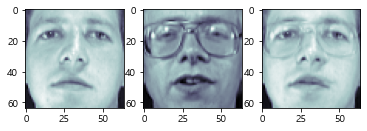

In [70]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap = plt.cm.bone)
ax[0].grid(False)

ax[1].imshow(faces.images[10], cmap = plt.cm.bone)
ax[1].grid(False)

#행렬에 스칼라 데이터를 곱한 후  더하기
ax[2].imshow(0.7 * faces.images[6] + 0.3 * faces.images[10], 
             cmap = plt.cm.bone)
ax[2].grid(False)

plt.show()

In [72]:
#이차 형식
x = np.array([1, 3, 5])
print(x)

A = np.arange(1, 10).reshape(3, 3)
print(A)

print(x.T @ A @ x)

[1 3 5]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
549


## 행렬의 성질

### 대각합

In [75]:
vector = np.arange(16).reshape(4, -1)
print(vector)
print(np.trace(vector))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
30


### 행렬식

In [77]:
ar = np.array([[1, 2], [3, 4]])
print(np.linalg.det(ar)) # 1* 4 - 2 * 3 = 2

mat = np.array([[1, 1, 1], [2, 1, 6], [2, 3, 4]])
print(np.linalg.det(mat)) #(1 * (4 - 18) -1 * (8 - 12) + 1 *(6 - 2))
# -14 + 4 + 4

-2.0000000000000004
-6.0


## 선형 연립 방정식 과 역행렬

### 역행렬

In [79]:
mat = np.array([[1, 2], [3, 4]])
print(np.linalg.inv(mat))

#역행렬 과의 곱 - 단위 행렬이 나와야 함
print(mat @ np.linalg.inv(mat))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00e+00 1.11e-16]
 [0.00e+00 1.00e+00]]


In [80]:
mat = np.array([[1, 2], [2, 4]]) # 1*4 - 2*2 이므로 행렬식이 0
print(np.linalg.inv(mat))#행렬식이 0이면 역함수가 존재하지 않음

LinAlgError: Singular matrix

In [81]:
mat = np.array([[1, 2], [3, 4]])
print(np.linalg.inv(mat.T)) #전치 행렬의 역행렬
print(np.linalg.inv(mat).T) #역행렬의 전치 행렬

[[-2.   1.5]
 [ 1.  -0.5]]
[[-2.   1.5]
 [ 1.  -0.5]]


In [83]:
mat = np.array([[2, 0], [0, 2]])
print(mat)
print(np.linalg.inv(mat)) #대칭 행렬의 역행렬도 대칭 행렬

[[2 0]
 [0 2]]
[[0.5 0. ]
 [0.  0.5]]


In [86]:
#역행렬을 이용한 연립 방정식 해결
'''
    x1 + x2 = 2
         x2 + x3 = 3
    x1 + x2 + x3 = 4
'''

#방정식의 계수를 가지고 계수 행렬을 생성
ar = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
print(ar)

#계수 행렬의 역행렬을 구합니다.
ar_inv = np.linalg.inv(ar)
print(ar_inv)

#결과 행렬을 생성
b = np.array([[2], [3], [4]])
print(b)

#계수의 역행렬 과 결과 행렬의 곱
print(ar_inv @ b)

[[1 1 0]
 [0 1 1]
 [1 1 1]]
[[ 0. -1.  1.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]
[[2]
 [3]
 [4]]
[[1.]
 [1.]
 [2.]]


In [91]:
#최소 자승을 이용한 연립 방정식 해결
'''
    x1 + x2 = 2
         x2 + x3 = 3
    x1 + x2 + x3 = 4
'''

#방정식의 계수를 가지고 계수 행렬을 생성
ar = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
print(ar)

#결과 행렬을 생성
b = np.array([[2], [3], [4]])
print(b)

#최소 자승 문제로 해결
x, resid, rank, s = np.linalg.lstsq(ar, b)
print(x) #연립 방정식의 해
print(resid) #잔차 - 해가 하나가 존재하므로 잔차가 없음
print(rank) #rank
print(s) #rank

[[1 1 0]
 [0 1 1]
 [1 1 1]]
[[2]
 [3]
 [4]]
[[1.]
 [1.]
 [2.]]
[]
3
[2.414 1.    0.414]


C:\Users\tj\AppData\Local\Temp/ipykernel_10904/3887505673.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(ar, b)


In [94]:
# 해가 없는 경우
'''
    x1 + x2        = 2
         x2 + x3   = 3
    x1 + x2 + x3   = 4
    x1 + x2 + 2x3  = 6.1
'''

#방정식의 계수를 가지고 계수 행렬을 생성
ar = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 2]])
print(ar)

'''
#계수 행렬의 역행렬을 구합니다. 에러 발생
ar_inv = np.linalg.inv(ar)
print(ar_inv)
'''

#결과 행렬을 생성
b = np.array([[2], [3], [4], [6.1]])
print(b)

#최소 자승 문제로 해결
x, resid, rank, s = np.linalg.lstsq(ar, b)
print(x) #연립 방정식의 해 - 1.033, 0.95, 2.05
print(resid) #잔차 - 해가 없으므로 잔차가 존재
print(rank) #rank
print(s) #rank

[[1 1 0]
 [0 1 1]
 [1 1 1]
 [1 1 2]]
[[2. ]
 [3. ]
 [4. ]
 [6.1]]
[[1.033]
 [0.95 ]
 [2.05 ]]
[0.002]
3
[3.358 1.151 0.634]


C:\Users\tj\AppData\Local\Temp/ipykernel_10904/1870035554.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, resid, rank, s = np.linalg.lstsq(ar, b)


## 희소 행렬

In [97]:
from scipy import sparse

#dense matrix 로 표현
ar = np.eye(3, k=1)
print(ar)

#희소 행렬로 표현 - 0이 아닌 경우만 표현
sp = sparse.csr_matrix(ar)
print(sp)

#희소 행렬을 밀집 행렬로 되돌리기
origin = sp.toarray()
print(origin)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
  (0, 1)	1.0
  (1, 2)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
